# Restaurant Reviews Analysis Model Based on ML Algorithms

In [1]:
# We have to import some basic important libraries before working on the machine learning model.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Next, we have to create a data frame. Download the dataset which was shown previously. And create using pandas.
#import Restaurant Reviews Dataset 
df=pd.read_table(r"Restaurant_Reviews.tsv")

In between Invited commas, paste the path of the Restaurant Reviews dataset on your computer. This will save the data frame in the df variable.

In [4]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


It will show the output like this. It will show the first five and last five rows and also it will show the number of rows and number of columns in the data frame.


In [7]:
# info() method gives the information about the data frame. I will give the number of columns, column labels, number of non-null entries, the data type of the column, memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Statistical Description:

It will give total count, mean, standard deviation, minimum value, maximum value, 25% of data, 50% of data, 75% of data.

In [8]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
#Let’s see the total columns in the df.
df.columns

Index(['Review', 'Liked'], dtype='object')

In [10]:
# nunique() method gives the number of unique values in the particular column
df['Liked'].nunique()

2

In [11]:
# unique() method gives unique values in the particular column.
print(df['Liked'].unique())

[1 0]


In [12]:
# value_counts() method gives the number of times the particular value repeated in that column through the data frame.
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [13]:
#Let’s see the top 5 entries of the data frame.

df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
# the tail() method is used to view the last 5 entries of the data frame.

df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


# Lets us see some Visualizations of our dataset

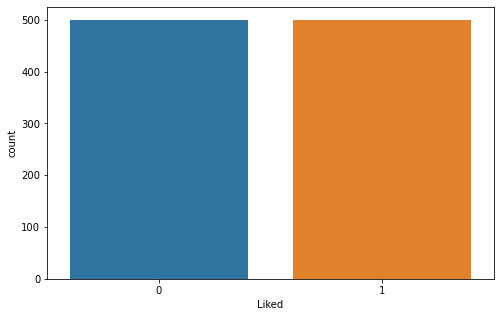

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

Here we used the seaborn library to visualize the data frame. This is a count plot where it counts the entries of the column and plots it.

# Lets us Define X and Y

Here, 
X is the input feature that we give to the model, 
Y is the output that the model should predict and coming to our dataset, the Review column is the input that we give, and Liked is going to be predicted by the model.

In [17]:
x=df['Review'].values
y=df['Liked'].values

# Split the Dataset into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
View the Shapes of Train Sets and Test Sets

In [20]:
x_train.shape

(750,)

In [21]:
x_test.shape

(250,)

In [22]:
y_train.shape

(750,)

In [23]:
y_test.shape

(250,)

# Import CountVectorizer


from the sci-kit learn library we have to import CountVectorizer. And then store it in a variable something like vect with setting stop_wors as “English”.

This count vectorizer transforms the text into a vector based on the count of the words like the number of times the word is repeated in the sentence.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [25]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

# Import Support Vector Classifier(SVC)

Import Support Vector Classifier(SVC) from Support Vector Machine (SVM) library and assign it to a variable called a model.

In [26]:
from sklearn.svm import SVC
model=SVC()

# Train the Model


The fit method is used to train the model and we have to pass training datasets as arguments in it to train the model.

In [27]:
model.fit(x_train_vect,y_train)

SVC()

# Predict the Test Results

In [28]:
#Use predict method to predict the test results. Pass the x variables of the testing dataset in it.
y_pred=model.predict(x_test_vect)

# Evaluate the Model

For machine learning models to evaluate it, we use variable methods and all these are in the metrics library and here for support vector classifier(svc), we use accuracy score to evaluate it.

Import accuracy_score from scikit learn metrics library and then pass two arguments to which we have to compare and evaluate. Here predicted dataset and test dataset are taken to evaluate.

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

# Using Pipeline

In [39]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())

# Train the Model with Training Sets

In [40]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

# Predict the Test Results

In [41]:
y_pred=text_model.predict(x_test)

In [42]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

# Evaluate the Model


Let’s evaluate our new model using accuracy_method.

In [43]:
accuracy_score(y_pred,y_test)

0.792

# Save the Model


We can save the model and for that, we have to use joblib. Import joblib and using dump method we can save it. We have to pass two arguments in it. one is the model and the other is the name of our file.

In [44]:
import joblib
joblib.dump(text_model,'Project')

['Project']

And again to use it we have to use the load method. We can retrieve it using the load method and save it to a variable.

In [47]:
import joblib
text_model=joblib.load('Project')

# Prediction of New Reviews using the Model

Now our model is well trained and ready for implementation.

In [49]:
#Example 1 for positive review
text_model.predict(['I love this food, specially Icecream'])

array([1], dtype=int64)

Here the review is a positive review and as expected our model predicted 1 for it which means positive.

In [50]:
#Example 2 for negative review
text_model.predict(["dam!!it was too salty and spicy and i asked you don't add too much "])

array([0], dtype=int64)

As expected it gave 0 as output which means negative.

# Thank you 